In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from lm_anal.script.lmFile import Input,InitialSpeciesCounts,InitialSpeciesCountsBackward,OrderParameter,SimulationParameter,Tiling
from lm_anal.src.main import Sim

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%bash
dirname=data/1
filename=${dirname}/genetic_toggle_switch.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} genetic_toggle_switch.sbml

lm_sbml_import v2016.02.12 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.


In [3]:
ffluxInput = Input('data/1/genetic_toggle_switch.lm')

iSCs = InitialSpeciesCounts(speciesCounts=[4,16,1,0,0,0,0])
ffluxInput.SetInitialSpeciesCounts(iSCs=iSCs)

iSCBs = InitialSpeciesCountsBackward(speciesCounts=[0,0,0,4,16,1,0])
ffluxInput.SetInitialSpeciesCountsBackward(iSCBs=iSCBs)

ops = [
OrderParameter(type=0,
               id=0,
               speciesIDs=[0,1,2,3,4,5],
               speciesCoefficients=[-1,-2,-2,1,2,2])]
ffluxInput.SetOrderParameters(ops=ops)

# general simulation parameters
simParams = [SimulationParameter(key='maxSteps',         val=str(int(1e10))),
             SimulationParameter(key='maxTime',          val=str(int(1e10))),
             SimulationParameter(key='maxWorkUnitSteps', val=str(int(1e15))),
             SimulationParameter(key='writeInterval',    val='4.0')]

# forward flux specific simulation parameters
simParams+= [SimulationParameter(key='maxCrossingsZero', val=str(int(1e3))),
             SimulationParameter(key='maxCrossingsN',    val=str(int(1e3)))]
ffluxInput.SetSimulationParameters(simParams=simParams)

tilings = [
    Tiling(id=0,
           orderParameterID=0,
           type=0,
           edges=np.linspace(-27,27,13)),
    Tiling(id=3,
           orderParameterID=0,
           type=0,
           edges=np.arange(-100,100))]
ffluxInput.AddTilings(tilings=tilings, currentTilingID=0)

ffluxInput.Close()

SimulationParameter(key='maxSteps', val='10000000000')
SimulationParameter(key='maxTime', val='10000000000')
SimulationParameter(key='maxWorkUnitSteps', val='1000000000000000')
SimulationParameter(key='writeInterval', val='4.0')
SimulationParameter(key='maxCrossingsZero', val='1000')
SimulationParameter(key='maxCrossingsN', val='1000')


In [4]:
%%bash
dirname=data/1
filename=${dirname}/genetic_toggle_switch.lm
echo "Execute the following command in `pwd`:"
#lmes -r 1-1 -f ${filename} -gr 0 -c 2
lmes -sl lm::cme::GillespieDSolver -f ${filename} -gr 0 -c 5 -fflux -intout
#> ${filename}.log
echo "Finished."

Execute the following command in /Users/tel/git/lm_mpi_thread_multiple/regression/forward_flux:
Lattice Microbe ES v2016.02.12 build 1 in 64-bit mode with options MPI AVX.
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.

MPI version 3.0 with thread support MPI_THREAD_MULTIPLE.
Running with 1 process(es).

2016-02-16 17:08:41) Resource controller 0:1 started.
2016-02-16 17:08:41) Supervisor 0:2 started.
2016-02-16 17:08:41) Resource controller 0:1 on tels_macbook registered with 8 cpu core(s) and 0 gpu device(s).
2016-02-16 17:08:41) Registered resources for host tels_macbook (defaults=1): 5 cpu cores, 0 gpu devices
2016-02-16 17:08:41) All resources registered with supervisor, starting workers.
2016-02-16 17:08:41) Reserved core 0 on 0:1 for the output writer.
2016-02-16 17:08:41) Creating slot 0 on process (0:1) using resources: tels_macbook; cpu core list:1; gpu device list:<no

In [3]:
sim = Sim(fPath='data/1/genetic_toggle_switch.lm', clearInt=True)
sim.ffluxHists.transformKwargs = {'tilingIDs':((3,),)}

In [3]:
sim.ffluxHists(('BinTilingIDs', (3,)))

1.01167062694e-05
the FORWARD phase zero best fit weight is: 6.42470703
5.87064563894e-06
the BACKWARD phase zero best fit weight is: 4.46513672


(<matplotlib.figure.Figure at 0x113e06588>,
 {'figsize': (12, 12)},
 {},
 {})

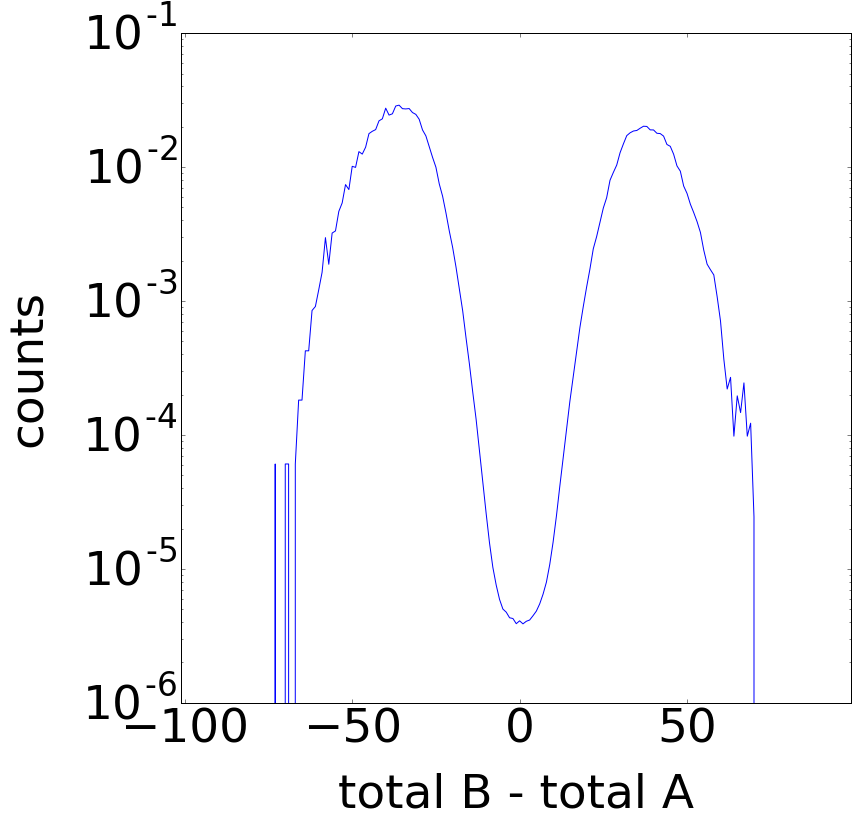

In [4]:
sim.ffluxHists(('BinTilingIDs', (3,))).plot()

In [4]:
print(list(sim.oparamFPTs.keys()))
oparamFPT = sim.oparamFPTs(('Direction', 'FORWARD'))

print(oparamFPT.points.__repr__())
print(oparamFPT.time)

[(('InterfaceTilingID', 0), ('Direction', 'BACKWARD')), (('InterfaceTilingID', 0), ('Direction', 'FORWARD'))]
array([(0, -27.0, -38.0, 48.67334638932382),
       (0, -22.5, -38.0, 538.3272110659213),
       (0, -18.0, -38.0, 1938.516287048383),
       (0, -13.5, -38.0, 15039.009354921354),
       (0, -9.0, -38.0, 107589.07292510738),
       (0, -4.5, -38.0, 516104.78282174),
       (0, 0.0, -38.0, 816993.8712068144),
       (0, 4.5, -38.0, 1138889.4564622992),
       (0, 9.0, -38.0, 1332500.6640608902),
       (0, 13.5, -38.0, 1443098.219177944),
       (0, 18.0, -38.0, 1482061.8710957486),
       (0, 22.5, -38.0, 1492436.304193419),
       (0, 27.0, -38.0, 1495421.176801806),
       (0, 27.0, 38.0, 49.98146190763552),
       (0, 22.5, 38.0, 405.74950776618516),
       (0, 18.0, 38.0, 2278.2834861071296),
       (0, 13.5, 38.0, 11778.725623173861),
       (0, 9.0, 38.0, 150355.43257981434),
       (0, 4.5, 38.0, 506096.3860636551),
       (0, 0.0, 38.0, 888199.1575417146),
       (0, -

In [15]:
ffluxOutputs = sim.ffluxOutputs[0]
print(ffluxOutputs.basins['FORWARD'].probability_i_to_i_plus_one)
print(ffluxOutputs.basins['FORWARD'].flux_out_of_tile_zero)

[ 0.          0.09041591  0.27770064  0.1288992   0.13978194  0.20846362
  0.63171194  0.71736011  0.85470085  0.92336103  0.97370983  0.99304866
  0.99800399  0.        ]
0.020545125293036016


In [19]:
sim.oparamFPTs(('Direction', 'FORWARD')).time

array([  4.86733464e+01,   5.38327211e+02,   1.93851629e+03,
         1.50390094e+04,   1.07589073e+05,   5.16104783e+05,
         8.16993871e+05,   1.13888946e+06,   1.33250066e+06,
         1.44309822e+06,   1.48206187e+06,   1.49243630e+06,
         1.49542118e+06])